--2020-11-10 17:33:55--  https://upload.wikimedia.org/wikipedia/commons/e/ed/Elon_Musk_Royal_Society.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 239507 (234K) [image/jpeg]
Saving to: ‘img.jpg’

img.jpg             100%[===================>] 233.89K  --.-KB/s    in 0.08s   

2020-11-10 17:33:56 (2.83 MB/s) - ‘img.jpg’ saved [239507/239507]



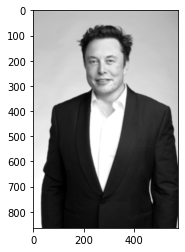

(864, 576)


In [37]:
%matplotlib inline
from PIL import Image
from matplotlib.image import imsave
from matplotlib import pyplot as plt
import cv2
import numpy as np
import base64
import io
import urllib
import skimage
#from skimage import data, io, filters
!wget https://upload.wikimedia.org/wikipedia/commons/e/ed/Elon_Musk_Royal_Society.jpg -O img.jpg

img=cv2.imread('img.jpg')
img = np.array(img, dtype=np.uint8)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


432 288


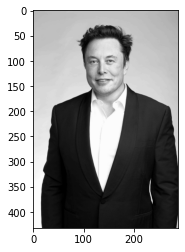

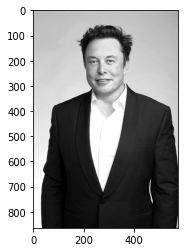

'\nsmall_to_large_image_size_ratio = 0.1\n\nplt.imshow(fotito)\nplt.show()\nfor x in range(4):\n  small_img = cv2.resize(fotito, # original image\n                        (0,0), # set fx and fy, not the final size\n                        fx=small_to_large_image_size_ratio, \n                        fy=small_to_large_image_size_ratio, \n                        interpolation=cv2.INTER_NEAREST)\n\n                        \n  plt.imshow(small_img)\n  plt.show()\n  small_to_large_image_size_ratio-=0.005\n\n'

In [32]:
#Downsample
h,w=img.shape
h2,w2= (h//2,w//2)
blank_image = np.zeros((h2,w2,3), np.uint8)

print(h2, w2)

for x in range(w2):
  for y in range(h2):
    blank_image[y,x] = (img[y*2,x*2]//4 + img[y*2+1,x*2]//4 + img[y*2,x*2+1]//4 + img[y*2+1,x*2+1]//4)

plt.imshow(blank_image,cmap='gray')
plt.show()

plt.imshow(img,cmap='gray')
plt.show()



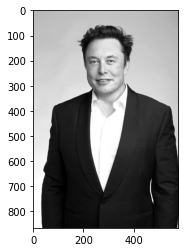

(866, 578, 3)


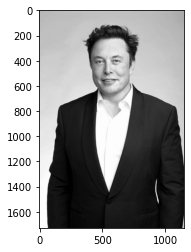

'for x in range(10):\n  small_img = cv2.resize(fotito, # original image\n                        (0,0), # set fx and fy, not the final size\n                        fx=small_to_large_image_size_ratio, \n                        fy=small_to_large_image_size_ratio, \n                        interpolation=cv2.INTER_NEAREST)\n\n                        \n  plt.imshow(small_img)\n  plt.show()\n  small_to_large_image_size_ratio+=0.005\n'

In [45]:
#Upsampling 
h,w = img.shape

#Estos +2 es para ampliar la images
h2 =h+2
w2 =w+2

blank_image = np.zeros((h2,w2,3), np.uint8)

for x in range(w):
  for y in range(h):
    blank_image[y+1,x+1]=img[y,x] 

for x in range(w):
  blank_image[0,x+1]=img[0,x]
  blank_image[h2-1,x+1]=img[h2-3,x]

for y in range(h):
  blank_image[y+1,0]=img[y,0]
  blank_image[y+1,w2-1]=img[y,w2-3]


plt.imshow(blank_image,cmap='gray')
plt.show()
print(blank_image.shape)



imagen_nueva = np.zeros((h*2,w*2,3), np.uint8)

for x in range(1,w+1):
  for y in range(1,h+1):
    imagen_nueva[(y-1)*2,(x-1)*2] = blank_image[y,x]//2 + blank_image[y-1,x]//4 + blank_image[y,x-1]//4
    imagen_nueva[(y-1)*2+1,(x-1)*2] = blank_image[y,x]//2 + blank_image[y+1,x]//4 + blank_image[y,x-1]//4
    imagen_nueva[(y-1)*2,(x-1)*2+1] = blank_image[y,x]//2 + blank_image[y-1,x]//4 + blank_image[y,x+1]//4
    imagen_nueva[(y-1)*2+1,(x-1)*2+1] = blank_image[y,x]//2 + blank_image[y+1,x]//4 + blank_image[y,x+1]//4
    
plt.imshow(imagen_nueva,cmap='gray')
plt.show()
